In [1]:
import numpy as np
import datetime as dt
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day'])
    df = df.astype(float)

    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Weekend Return', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    
    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percentage, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Features')
    plt.show()
    
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Holiday', 'Weekend Return', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4014:4056]
    df_final['Prediction']=y_pred[291:333]

    accuracy_f = accuracy_score(y_test[291:333], y_pred[291:333])
    print("Accuracy final:", accuracy_f)

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_final2.csv', index=False)
    return df_final
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

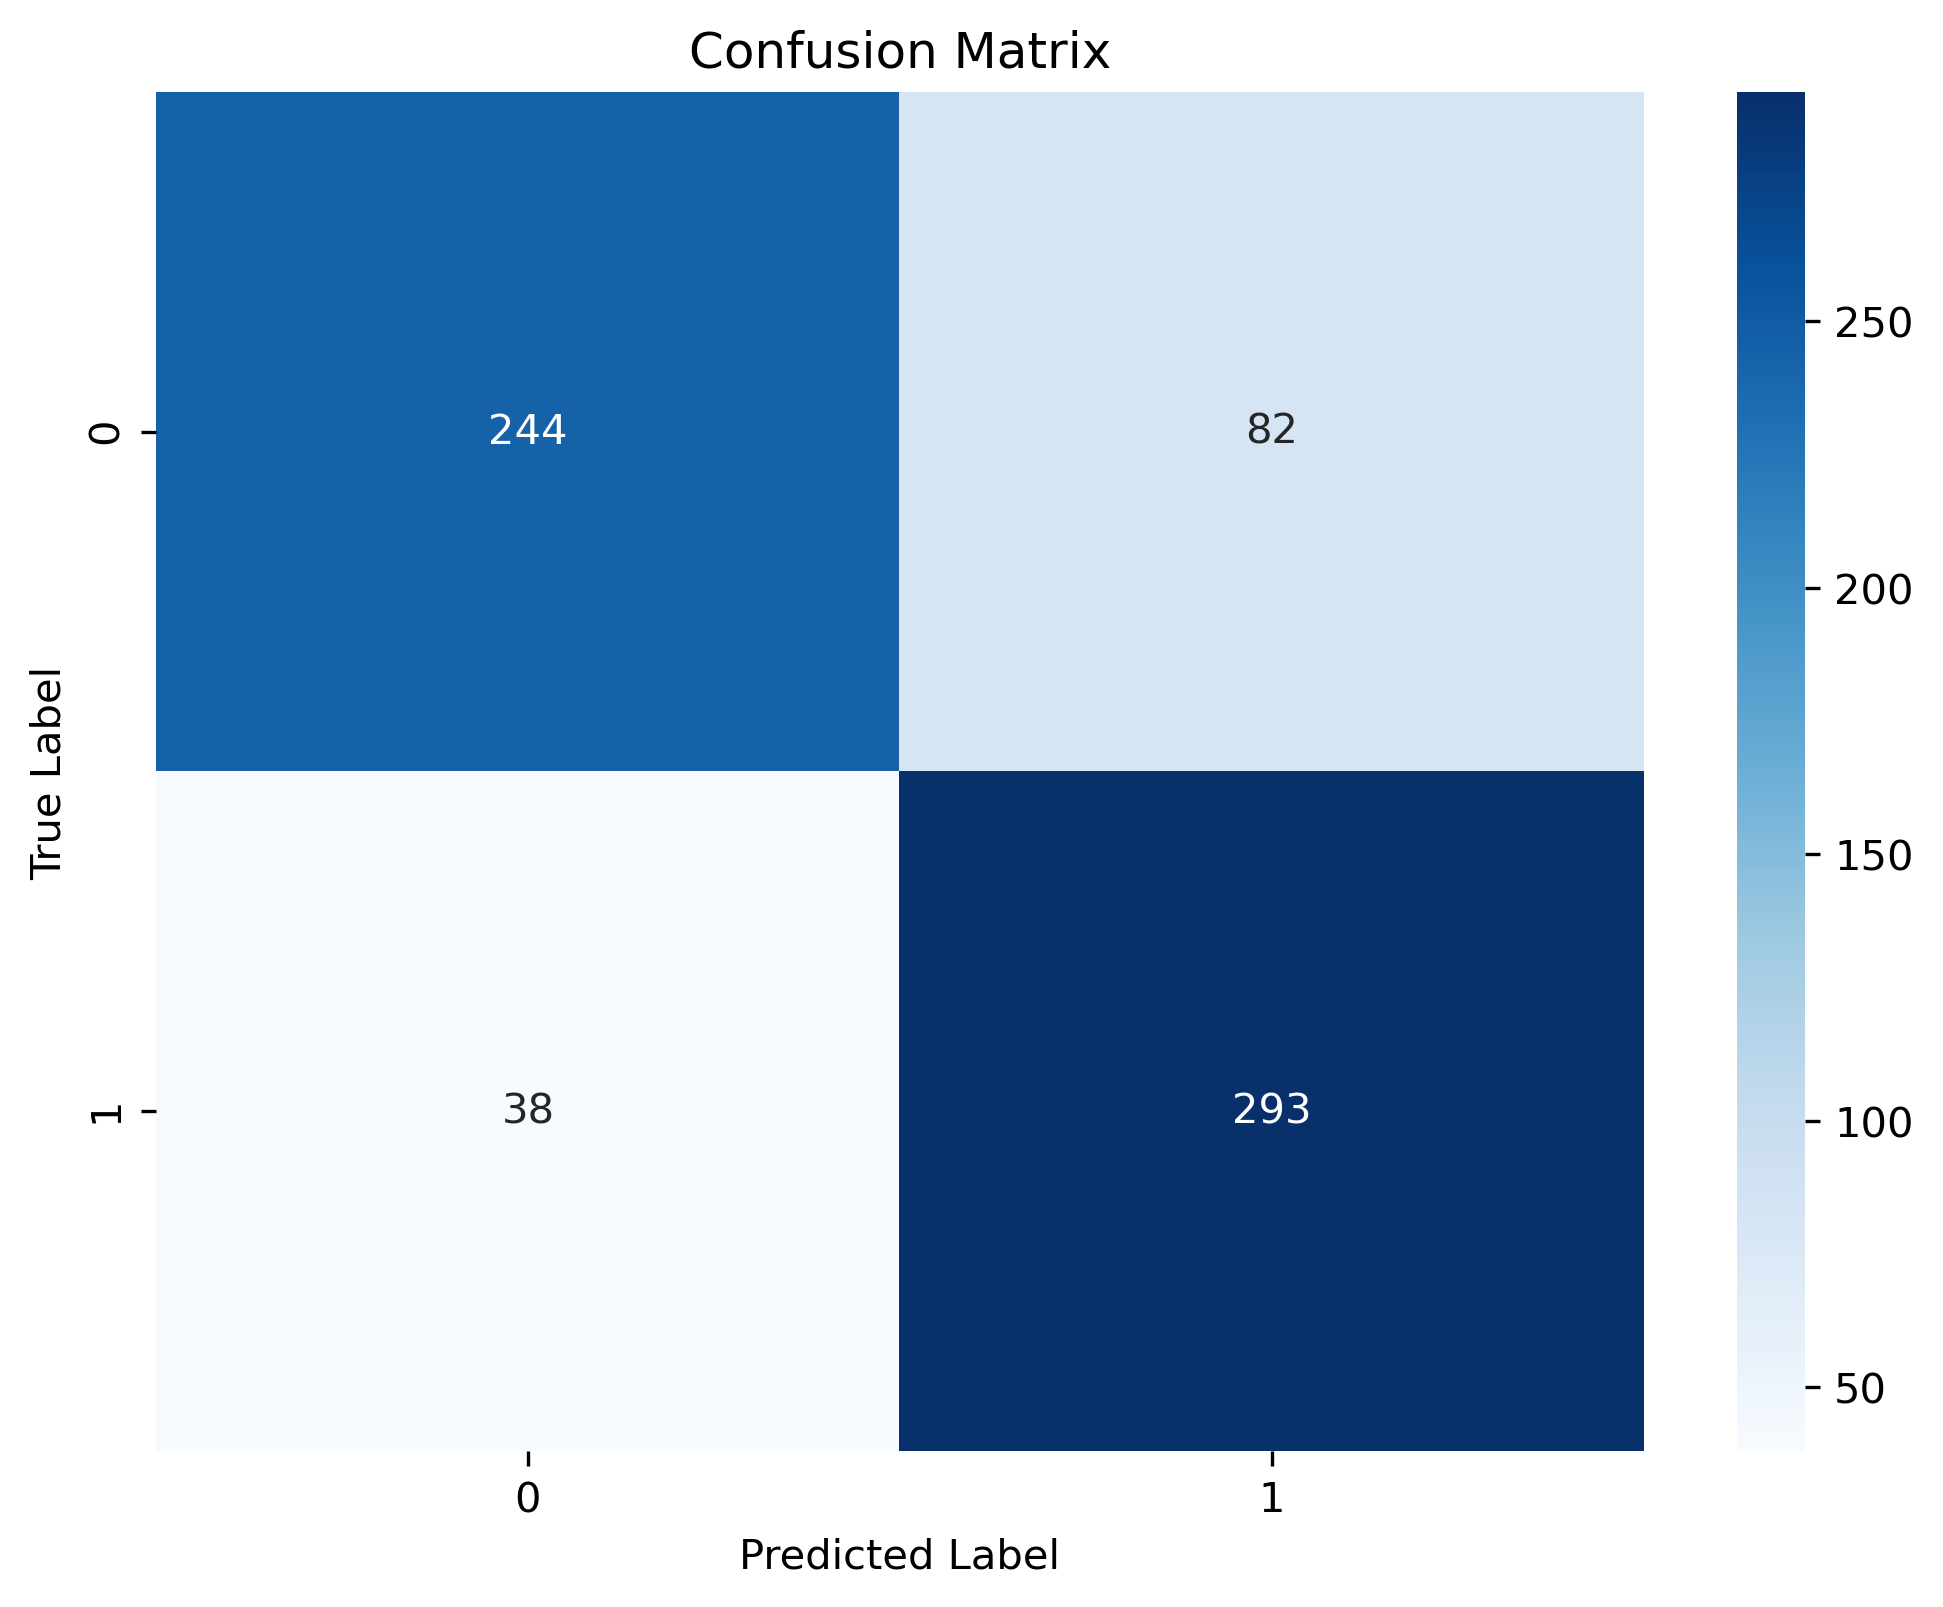

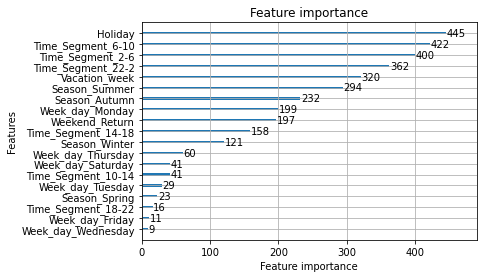

Sensitivity: 0.8851963746223565
Specificity: 0.7484662576687117


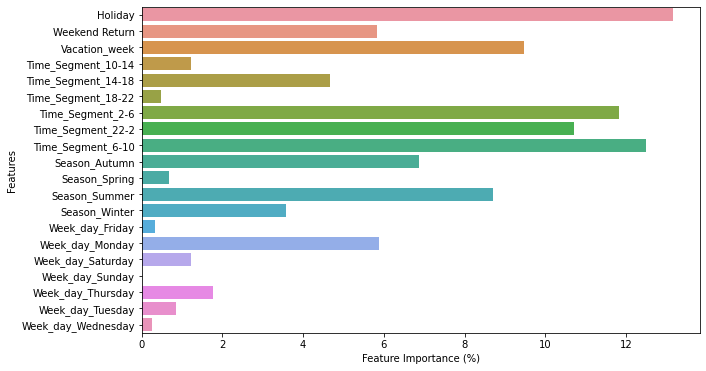

Accuracy final: 0.8571428571428571
       Day Holiday Weekend Return Time_Segment Season  Week_day  Vacation_week  Exceeds Threshold  Prediction
2022-11-01      No             No          2-6 Autumn   Tuesday              1                  0         0.0
2022-11-01      No             No         6-10 Autumn   Tuesday              1                  0         1.0
2022-11-01      No             No        10-14 Autumn   Tuesday              1                  1         1.0
2022-11-01      No             No        14-18 Autumn   Tuesday              1                  0         1.0
2022-11-01      No             No        18-22 Autumn   Tuesday              1                  0         1.0
2022-11-01      No             No         22-2 Autumn   Tuesday              1                  0         0.0
2022-11-02      No             No          2-6 Autumn Wednesday              1                  0         0.0
2022-11-02      No             No         6-10 Autumn Wednesday              1       

In [3]:
main()